<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Gnome-Data-Analysis-with-Python/blob/main/Data_Analysis_for_Genomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.6 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
rna_df = pd.read_csv('https://raw.githubusercontent.com/Srayoshi-Mirza/Gnome-Data-Analysis-with-Python/main/GRCh38_latest_rna_summary.csv')
protein_df = pd.read_csv('https://raw.githubusercontent.com/Srayoshi-Mirza/Gnome-Data-Analysis-with-Python/main/GRCh38_latest_protein_symmery.csv')
genomic_df = pd.read_csv('https://raw.githubusercontent.com/Srayoshi-Mirza/Gnome-Data-Analysis-with-Python/main/GRCh38_latest_genomic_summary.csv')

In [5]:
# Display the first few rows of each dataframe
print("RNA Data:")
print(rna_df.head())

RNA Data:
            ID  Sequence_len  \
0  NM_000014.6          4610   
1  NM_000015.3          1285   
2  NM_000016.6          2261   
3  NM_000017.4          1859   
4  NM_000018.4          2184   

                                         Description  
0  NM_000014.6 Homo sapiens alpha-2-macroglobulin...  
1  NM_000015.3 Homo sapiens N-acetyltransferase 2...  
2  NM_000016.6 Homo sapiens acyl-CoA dehydrogenas...  
3  NM_000017.4 Homo sapiens acyl-CoA dehydrogenas...  
4  NM_000018.4 Homo sapiens acyl-CoA dehydrogenas...  


In [6]:
print("\nProtein Data:")
print(protein_df.head())


Protein Data:
            ID  Sequence_len  \
0  NP_000005.3          1474   
1  NP_000006.2           290   
2  NP_000007.1           421   
3  NP_000008.1           412   
4  NP_000009.1           655   

                                         Description  
0  NP_000005.3 alpha-2-macroglobulin isoform a pr...  
1  NP_000006.2 arylamine N-acetyltransferase 2 [H...  
2  NP_000007.1 medium-chain specific acyl-CoA deh...  
3  NP_000008.1 short-chain specific acyl-CoA dehy...  
4  NP_000009.1 very long-chain specific acyl-CoA ...  


In [7]:
print("\nGenomic Data:")
print(genomic_df.head())


Genomic Data:
             ID  Sequence_len  \
0  NC_000001.11     248956422   
1   NT_187361.1        175055   
2   NT_187362.1         32032   
3   NT_187363.1        127682   
4   NT_187364.1         66860   

                                         Description  
0  NC_000001.11 Homo sapiens chromosome 1, GRCh38...  
1  NT_187361.1 Homo sapiens chromosome 1 unlocali...  
2  NT_187362.1 Homo sapiens chromosome 1 unlocali...  
3  NT_187363.1 Homo sapiens chromosome 1 unlocali...  
4  NT_187364.1 Homo sapiens chromosome 1 unlocali...  


In [8]:
# Check column names
print("\nColumn Names:")
print(rna_df.columns)


Column Names:
Index(['ID', 'Sequence_len', 'Description'], dtype='object')


In [11]:
print("\nColumn Names:")
print(protein_df.columns)


Column Names:
Index(['ID', 'Sequence_len', 'Description'], dtype='object')


In [12]:
print("\nColumn Names:")
print(genomic_df.columns)


Column Names:
Index(['ID', 'Sequence_len', 'Description'], dtype='object')


In [9]:
# Check data types
print("\nData Types:")
print(rna_df.dtypes)


Data Types:
ID              object
Sequence_len     int64
Description     object
dtype: object


In [10]:
# Summary statistics
print("\nSummary Statistics for RNA Data:")
print(rna_df.describe())


Summary Statistics for RNA Data:
        Sequence_len
count  184489.000000
mean     3872.331277
std      3681.937116
min        33.000000
25%      1686.000000
50%      3026.000000
75%      5049.000000
max    109224.000000


In [13]:
# Convert data types (if needed)
# Example: rna_df['Column_Name'] = rna_df['Column_Name'].astype('desired_data_type')

In [14]:
# Handle missing values (if any)
rna_df.dropna(inplace=True)

# Remove duplicates (if any)
rna_df.drop_duplicates(inplace=True)

In [15]:
# Handle missing values (if any)
protein_df.dropna(inplace=True)

# Remove duplicates (if any)
protein_df.drop_duplicates(inplace=True)

In [16]:
# Handle missing values (if any)
genomic_df.dropna(inplace=True)

# Remove duplicates (if any)
genomic_df.drop_duplicates(inplace=True)

In [17]:
avg_seq_length_rna = rna_df['Sequence_len'].mean()
avg_seq_length_protein = protein_df['Sequence_len'].mean()
avg_seq_length_genomic = genomic_df['Sequence_len'].mean()

print(f"Average Sequence Length for RNA Data: {avg_seq_length_rna}")
print(f"Average Sequence Length for Protein Data: {avg_seq_length_protein}")
print(f"Average Sequence Length for Genomic Data: {avg_seq_length_genomic}")

Average Sequence Length for RNA Data: 3872.3312772035188
Average Sequence Length for Protein Data: 692.6557752601088
Average Sequence Length for Genomic Data: 4678625.015602837


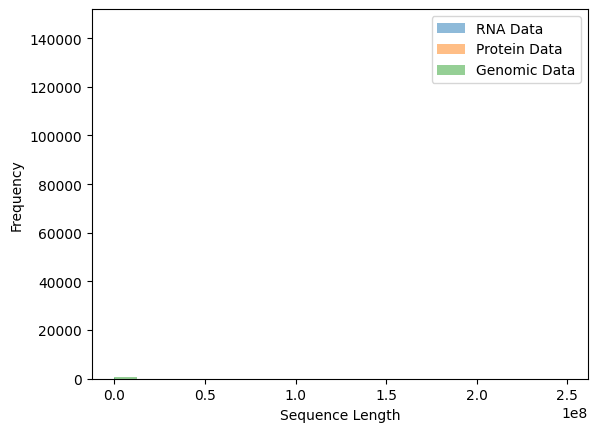

In [21]:
import matplotlib.pyplot as plt

plt.hist(rna_df['Sequence_len'], bins=20, alpha=0.5, label='RNA Data')
plt.hist(protein_df['Sequence_len'], bins=20, alpha=0.5, label='Protein Data')
plt.hist(genomic_df['Sequence_len'], bins=20, alpha=0.5, label='Genomic Data')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [22]:
common_genes_df = pd.merge(rna_df, protein_df, on='ID', how='inner')

In [23]:
# Average sequence length of common genes
avg_seq_length_common = common_genes_df['Sequence_len_x'].mean()
print(f"Average Sequence Length of Common Genes: {avg_seq_length_common}")

# Descriptions of common genes
common_gene_descriptions = common_genes_df['Description_x']
print("Descriptions of Common Genes:")
print(common_gene_descriptions)


Average Sequence Length of Common Genes: nan
Descriptions of Common Genes:
Series([], Name: Description_x, dtype: object)


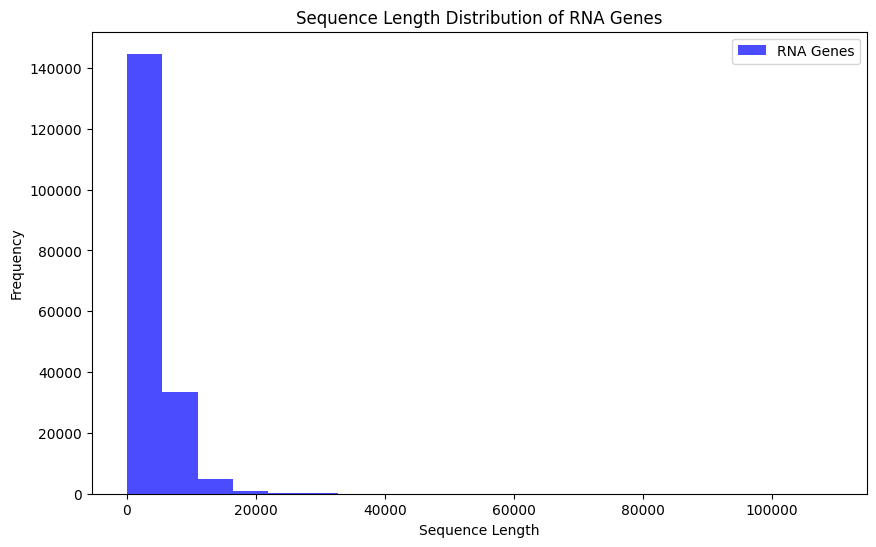

In [25]:
# Plot Sequence Length Distribution for RNA Genes
plt.figure(figsize=(10, 6))
plt.hist(rna_df['Sequence_len'], bins=20, color='blue', alpha=0.7, label='RNA Genes')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Sequence Length Distribution of RNA Genes')
plt.legend()
plt.show()

In [26]:
# Display Descriptions of RNA Genes
rna_gene_descriptions = rna_df['Description']
print("Descriptions of RNA Genes:")
for description in rna_gene_descriptions:
    print(description)

Streaming output truncated to the last 5000 lines.
NM_001329675.2 Homo sapiens cullin associated and neddylation dissociated 1 (CAND1), transcript variant 3, mRNA
NM_001329676.2 Homo sapiens cullin associated and neddylation dissociated 1 (CAND1), transcript variant 4, mRNA
NM_001329678.2 Homo sapiens PAXX non-homologous end joining factor (PAXX), transcript variant 1, mRNA
NM_001329684.2 Homo sapiens O-acyl-ADP-ribose deacylase 1 (OARD1), transcript variant 1, mRNA
NM_001329685.1 Homo sapiens O-acyl-ADP-ribose deacylase 1 (OARD1), transcript variant 2, mRNA
NM_001329686.2 Homo sapiens O-acyl-ADP-ribose deacylase 1 (OARD1), transcript variant 3, mRNA
NM_001329688.2 Homo sapiens O-acyl-ADP-ribose deacylase 1 (OARD1), transcript variant 5, mRNA
NM_001329689.2 Homo sapiens O-acyl-ADP-ribose deacylase 1 (OARD1), transcript variant 6, mRNA
NM_001329690.2 Homo sapiens O-acyl-ADP-ribose deacylase 1 (OARD1), transcript variant 7, mRNA
NM_001329691.2 Homo sapiens O-acyl-ADP-ribose deacylase 1 (

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
NR_047578.2 Homo sapiens glutamate ionotropic receptor AMPA type subunit 1 (GRIA1), transcript variant 8, non-coding RNA
NR_047580.2 Homo sapiens transketolase (TKT), transcript variant 5, non-coding RNA
NR_047581.2 Homo sapiens RNA polymerase III subunit E (POLR3E), transcript variant 6, non-coding RNA
NR_047582.2 Homo sapiens vacuolar protein sorting 13 homolog B (VPS13B), transcript variant 6, non-coding RNA
NR_047583.1 Homo sapiens interleukin 12 receptor subunit beta 2 (IL12RB2), transcript variant 5, non-coding RNA
NR_047584.1 Homo sapiens interleukin 12 receptor subunit beta 2 (IL12RB2), transcript variant 6, non-coding RNA
NR_047586.2 Homo sapiens transmembrane protein 218 (TMEM218), transcript variant 12, non-coding RNA
NR_047587.2 Homo sapiens transmembrane protein 218 (TMEM218), transcript variant 13, non-coding RNA
NR_047588.2 Homo sapiens transmembrane protein 218 (TMEM218), transcript variant 14, non-coding RNA
NR_047589.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
XM_011513771.2 PREDICTED: Homo sapiens PPARG coactivator 1 alpha (PPARGC1A), transcript variant X14, mRNA
XM_011513772.2 PREDICTED: Homo sapiens C1q and TNF related 7 (C1QTNF7), transcript variant X1, mRNA
XM_011513773.2 PREDICTED: Homo sapiens C1q and TNF related 7 (C1QTNF7), transcript variant X3, mRNA
XM_011513775.3 PREDICTED: Homo sapiens cytokine dependent hematopoietic cell linker (CLNK), transcript variant X1, mRNA
XM_011513777.4 PREDICTED: Homo sapiens cytoplasmic polyadenylation element binding protein 2 (CPEB2), transcript variant X2, mRNA
XM_011513778.4 PREDICTED: Homo sapiens cytoplasmic polyadenylation element binding protein 2 (CPEB2), transcript variant X3, mRNA
XM_011513779.3 PREDICTED: Homo sapiens cytoplasmic polyadenylation element binding protein 2 (CPEB2), transcript variant X4, mRNA
XM_011513784.2 PREDICTED: Homo sapiens parkin coregulated like (PACRGL), transcript variant X3, mRNA
XM_011513786.4 PREDICTED: Homo s

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



XM_024449627.2 PREDICTED: Homo sapiens JNK1/MAPK8 associated membrane protein (JKAMP), transcript variant X1, mRNA
XM_024449633.2 PREDICTED: Homo sapiens G protein subunit gamma 2 (GNG2), transcript variant X5, mRNA
XM_024449634.2 PREDICTED: Homo sapiens G protein subunit gamma 2 (GNG2), transcript variant X8, mRNA
XM_024449635.2 PREDICTED: Homo sapiens kelch like family member 28 (KLHL28), transcript variant X5, mRNA
XM_024449637.2 PREDICTED: Homo sapiens protein phosphatase, Mg2+/Mn2+ dependent 1A (PPM1A), transcript variant X22, mRNA
XM_024449638.2 PREDICTED: Homo sapiens protein phosphatase 2 regulatory subunit B''gamma (PPP2R3C), transcript variant X2, mRNA
XM_024449639.2 PREDICTED: Homo sapiens protein phosphatase 2 regulatory subunit B''gamma (PPP2R3C), transcript variant X3, mRNA
XM_024449644.2 PREDICTED: Homo sapiens RNA binding motif protein 23 (RBM23), transcript variant X7, mRNA
XM_024449647.2 PREDICTED: Homo sapiens protein phosphatase 2 regulatory subunit B'epsilon (PPP2R

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
XM_054329357.1 PREDICTED: Homo sapiens myosin XIX (MYO19), transcript variant X36, mRNA
XM_054329358.1 PREDICTED: Homo sapiens myosin XIX (MYO19), transcript variant X37, mRNA
XM_054329359.1 PREDICTED: Homo sapiens myosin XIX (MYO19), transcript variant X13, mRNA
XM_054329360.1 PREDICTED: Homo sapiens myosin XIX (MYO19), transcript variant X14, mRNA
XM_054329361.1 PREDICTED: Homo sapiens myosin XIX (MYO19), transcript variant X15, mRNA
XM_054329362.1 PREDICTED: Homo sapiens myosin XIX (MYO19), transcript variant X16, mRNA
XM_054329363.1 PREDICTED: Homo sapiens myosin XIX (MYO19), transcript variant X17, mRNA
XM_054329364.1 PREDICTED: Homo sapiens myosin XIX (MYO19), transcript variant X18, mRNA
XM_054329365.1 PREDICTED: Homo sapiens myosin XIX (MYO19), transcript variant X19, mRNA
XM_054329366.1 PREDICTED: Homo sapiens myosin XIX (MYO19), transcript variant X20, mRNA
XM_054329367.1 PREDICTED: Homo sapiens myosin XIX (MYO19), transcript

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




XR_939482.3 PREDICTED: Homo sapiens uncharacterized LOC105377544 (LOC105377544), transcript variant X2, ncRNA
XR_939483.3 PREDICTED: Homo sapiens uncharacterized LOC105377544 (LOC105377544), transcript variant X1, ncRNA
XR_939486.3 PREDICTED: Homo sapiens uncharacterized LOC105377546 (LOC105377546), ncRNA
XR_939487.2 PREDICTED: Homo sapiens uncharacterized LOC105377547 (LOC105377547), transcript variant X2, ncRNA
XR_939492.3 PREDICTED: Homo sapiens uncharacterized LOC105377549 (LOC105377549), transcript variant X1, ncRNA
XR_939494.3 PREDICTED: Homo sapiens uncharacterized LOC105377551 (LOC105377551), ncRNA
XR_939495.3 PREDICTED: Homo sapiens uncharacterized LOC105377552 (LOC105377552), ncRNA
XR_939510.3 PREDICTED: Homo sapiens uncharacterized LOC105377559 (LOC105377559), ncRNA
XR_939511.2 PREDICTED: Homo sapiens uncharacterized LOC105377560 (LOC105377560), ncRNA
XR_939512.1 PREDICTED: Homo sapiens uncharacterized LOC105377561 (LOC105377561), transcript variant X1, ncRNA
XR_939514.1 PR

In [27]:
# Display Average Sequence Length of RNA Genes
print(f"Average Sequence Length of RNA Genes: {avg_seq_length_rna:.2f}")

Average Sequence Length of RNA Genes: 3872.33


In [28]:
# Explore Characteristics of Protein Genes
avg_seq_length_protein = protein_df['Sequence_len'].mean()

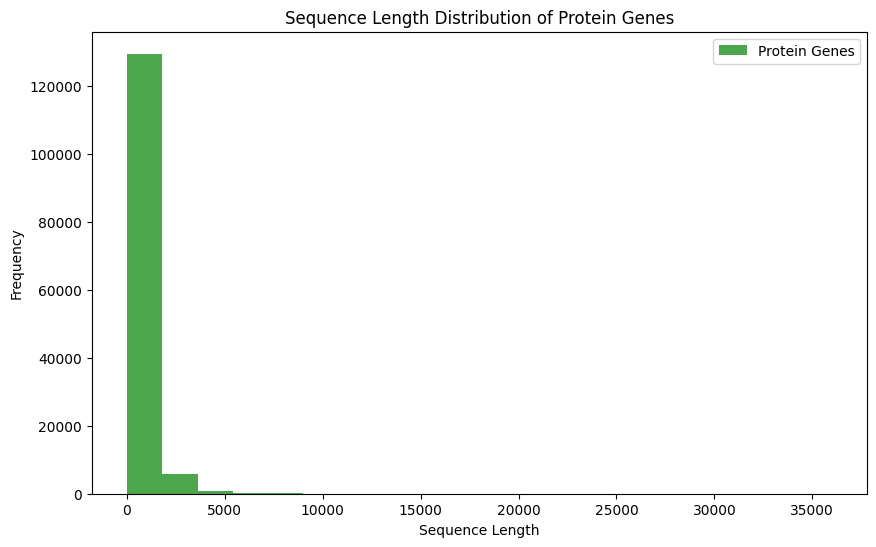

In [29]:
# Plot Sequence Length Distribution for Protein Genes
plt.figure(figsize=(10, 6))
plt.hist(protein_df['Sequence_len'], bins=20, color='green', alpha=0.7, label='Protein Genes')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Sequence Length Distribution of Protein Genes')
plt.legend()
plt.show()

In [30]:
# Display Descriptions of Protein Genes
protein_gene_descriptions = protein_df['Description']
print("Descriptions of Protein Genes:")
for description in protein_gene_descriptions:
    print(description)

Streaming output truncated to the last 5000 lines.
NP_001358087.1 neuronal cell adhesion molecule isoform ee precursor [Homo sapiens]
NP_001358088.1 neuronal cell adhesion molecule isoform ll precursor [Homo sapiens]
NP_001358089.1 neuronal cell adhesion molecule isoform ff precursor [Homo sapiens]
NP_001358090.1 neuronal cell adhesion molecule isoform N precursor [Homo sapiens]
NP_001358091.1 neuronal cell adhesion molecule isoform F precursor [Homo sapiens]
NP_001358092.1 neuronal cell adhesion molecule isoform E precursor [Homo sapiens]
NP_001358093.1 neuronal cell adhesion molecule isoform L [Homo sapiens]
NP_001358094.1 neuronal cell adhesion molecule isoform E precursor [Homo sapiens]
NP_001358095.1 neuronal cell adhesion molecule isoform O precursor [Homo sapiens]
NP_001358096.1 neuronal cell adhesion molecule isoform E precursor [Homo sapiens]
NP_001358097.1 neuronal cell adhesion molecule isoform D precursor [Homo sapiens]
NP_001358098.1 neuronal cell adhesion molecule isoform

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
XP_047273241.1 protein FAM13B isoform X3 [Homo sapiens]
XP_047273242.1 protein FAM13B isoform X4 [Homo sapiens]
XP_047273243.1 protein FAM13B isoform X4 [Homo sapiens]
XP_047273244.1 protein FAM13B isoform X4 [Homo sapiens]
XP_047273245.1 protein Largen isoform X1 [Homo sapiens]
XP_047273246.1 protein Largen isoform X3 [Homo sapiens]
XP_047273247.1 protein Largen isoform X3 [Homo sapiens]
XP_047273248.1 protein Largen isoform X3 [Homo sapiens]
XP_047273249.1 cAMP-specific 3',5'-cyclic phosphodiesterase 4D isoform X2 [Homo sapiens]
XP_047273250.1 cAMP-specific 3',5'-cyclic phosphodiesterase 4D isoform X2 [Homo sapiens]
XP_047273251.1 cAMP-specific 3',5'-cyclic phosphodiesterase 4D isoform X4 [Homo sapiens]
XP_047273252.1 cAMP-specific 3',5'-cyclic phosphodiesterase 4D isoform X5 [Homo sapiens]
XP_047273253.1 cAMP-specific 3',5'-cyclic phosphodiesterase 4D isoform X6 [Homo sapiens]
XP_047273254.1 cAMP-specific 3',5'-cyclic phosphodiester

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
# Display Average Sequence Length of Protein Genes
print(f"Average Sequence Length of Protein Genes: {avg_seq_length_protein:.2f}")

Average Sequence Length of Protein Genes: 692.66
